<a href="https://colab.research.google.com/github/KemalCanYologlu/Stat-112-Project-/blob/main/EDA_unknown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the NumPy library and aliasing it as np
import numpy as np

# Importing the Pandas library and aliasing it as pd
import pandas as pd

# Importing the Seaborn library and aliasing it as sns
import seaborn as sns

# Importing the Matplotlib library and aliasing it as plt
import matplotlib.pyplot as plt


In [ ]:
# Define a color palette for a specific context (e.g., categorical data)
c_palette = ["#CC4E5C", "#4169E1", "#FF8C00"]

# Define another color palette for a different context
b_palette = ["#4169E1", "#FF8C00"]

# Define yet another color palette for another context
d_palette = ["#CC4E5C", "#FF8C00"]


In [ ]:
from google.colab import files

# Prompting the user to upload files
uploaded = files.upload()


Saving Cleandata2.xlsx to Cleandata2 (2).xlsx


In [ ]:
# Reading data from an Excel file into a DataFrame
df = pd.read_excel('Cleandata2.xlsx')


In [ ]:
df.head()

,Unnamed: 0,ID,Age,Gender,Blood Pressure,Cholesterol Level,Family History,Smoking Status,Physical Activity,BMI,Glucose Level,Year,Heart Disease,Exercise Duration
0,0,1,45,Female,Normal,High,No,Non-smoker,Moderate,24.5,120,2021,No,150
1,1,2,52,Male,High,Normal,Yes,Smoker,Low,29.8,140,2022,Yes,120
2,2,3,36,Female,Low,High,Yes,Non-smoker,High,22.3,110,2023,Yes,105
3,3,4,68,Male,High,Normal,No,Smoker,Low,31.2,135,2022,Yes,90
4,4,5,29,Female,Normal,Normal,Yes,Smoker,Moderate,26.1,125,2021,Yes,120


In [ ]:
df.tail()

,Unnamed: 0,ID,Age,Gender,Blood Pressure,Cholesterol Level,Family History,Smoking Status,Physical Activity,BMI,Glucose Level,Year,Heart Disease,Exercise Duration
146,146,146,33,Female,Low,Normal,Yes,Non-smoker,Low,21.1,107,2023,No,150
147,147,147,56,Male,High,Normal,No,Smoker,Moderate,28.2,134,2022,Yes,120
148,148,148,41,Female,Normal,Normal,Yes,Smoker,Moderate,25.7,123,2021,No,150
149,149,149,65,Male,High,High,Yes,Smoker,Low,31.8,143,2023,Yes,90
150,150,150,31,Female,Normal,High,Yes,Non-smoker,Moderate,24.6,119,2022,No,150


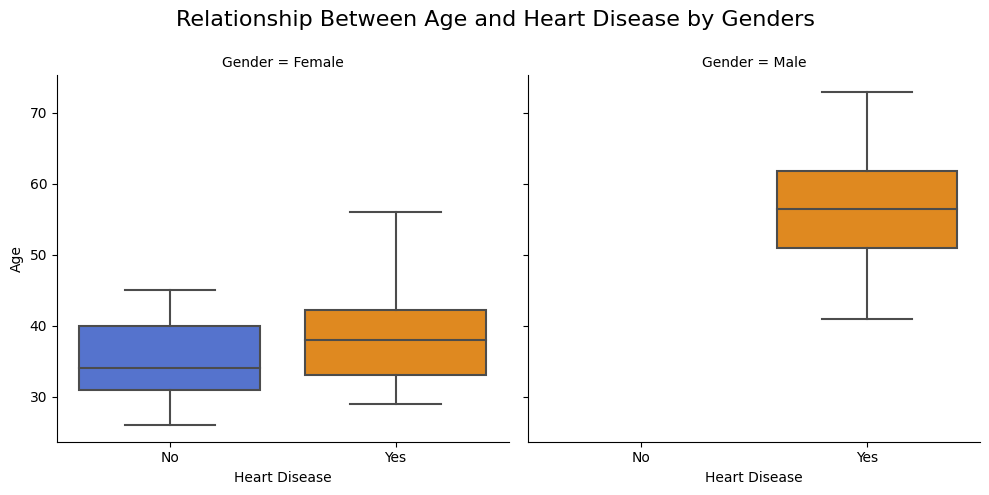

In [ ]:
# Creating a box plot using seaborn's catplot
sns.catplot(x="Heart Disease", y="Age", data=df, kind="box", col="Gender", palette=b_palette)

# Adjusting the layout to make room for the title
plt.subplots_adjust(top=0.85)

# Adding a title to the entire figure
plt.suptitle("Relationship Between Age and Heart Disease by Genders", fontsize=16)

# Displaying the plot
plt.show()

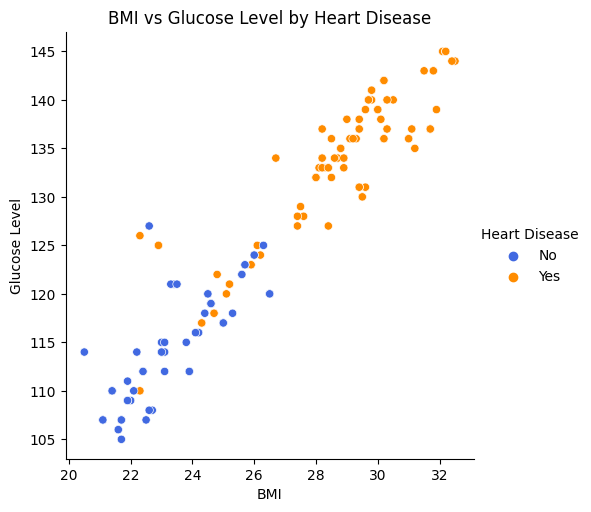

In [ ]:
# Creating a scatter plot using seaborn's relplot
sns.relplot(x="BMI", y="Glucose Level", data=df, kind="scatter", hue="Heart Disease", palette=b_palette)

# Adding title to the plot
plt.title('BMI vs Glucose Level by Heart Disease')

# Displaying the plot
plt.show()

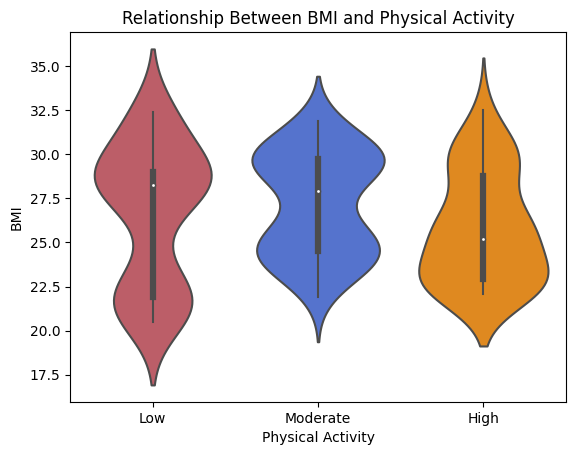

In [ ]:
# Define the order of categories for the 'Physical Activity' variable
order_list = ['Low', 'Moderate', 'High']

# Create a violin plot using Seaborn
sns.violinplot(x='Physical Activity', y='BMI', data=df, palette=c_palette, order=order_list)

# Add labels to the axes and a title to the plot
plt.xlabel('Physical Activity')
plt.ylabel('BMI')
plt.title('Relationship Between BMI and Physical Activity')

# Display the plot
plt.show()

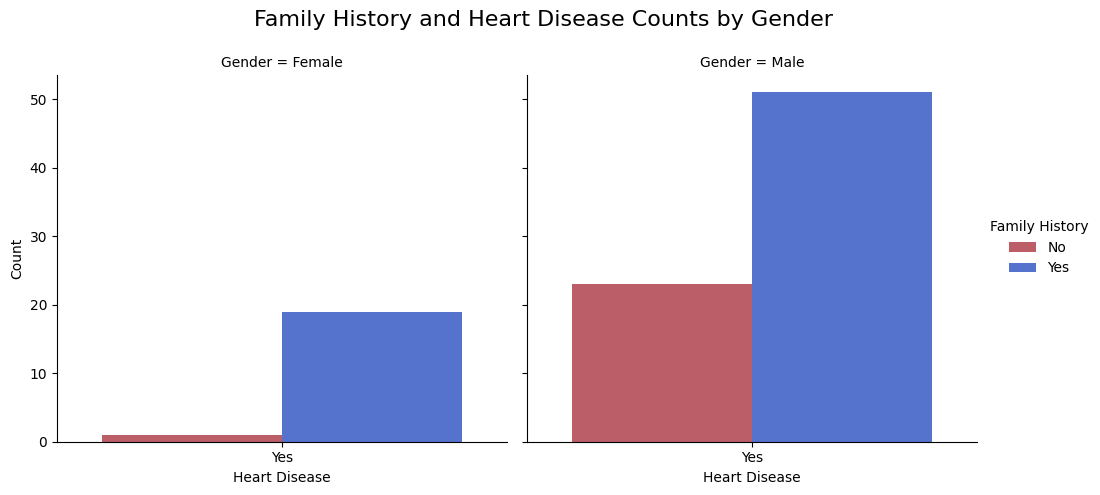

In [ ]:
# Filtering rows where 'Heart Disease' is 'Yes' in the DataFrame 'df'
heart_disease_yes = df[df['Heart Disease'] == 'Yes']

# Grouping the filtered data by 'Family History', 'Heart Disease', and 'Gender', and counting the occurrences
family_heart_count = heart_disease_yes.groupby(['Family History', 'Heart Disease', 'Gender']).size().reset_index(name='Count')

# Creating a categorical plot using seaborn
g = sns.catplot(x='Heart Disease', y='Count', data=family_heart_count, kind='bar', hue='Family History', col='Gender', palette=c_palette)

# Adjusting the layout of the figure to make room for the title
g.fig.subplots_adjust(top=0.85)

# Adding a title to the entire figure
g.fig.suptitle('Family History and Heart Disease Counts by Gender', fontsize=16)

# Displaying the plot
plt.show()

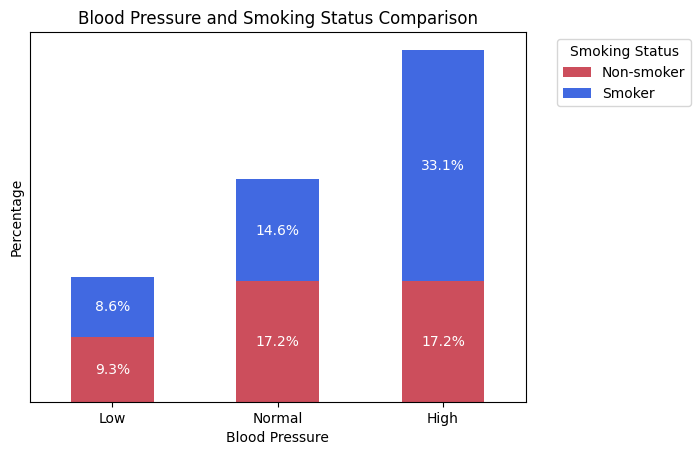

In [ ]:
# Grouping the data by 'Blood Pressure' and 'Smoking Status' and counting occurrences
bp_smoking_count = df.groupby(['Blood Pressure', 'Smoking Status']).size().unstack()

# Calculating the percentage distribution
bp_smoking_percentage = bp_smoking_count / bp_smoking_count.values.sum() * 100

# Reordering the rows based on specified categories
categories = ['Low', 'Normal', 'High']
bp_smoking_percentage = bp_smoking_percentage.reindex(categories)

# Defining colors for each Smoking Status category
colors = {"Non-smoker": "#CC4E5C", "Smoker": "#4169E1"}

# Creating a stacked bar plot
ax = bp_smoking_percentage.plot(kind='bar', stacked=True, rot=0, color=[colors[col] for col in bp_smoking_percentage.columns])

# Adding title and axis labels
plt.title('Blood Pressure and Smoking Status Comparison')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage')

# Adding legend with specified title and location
plt.legend(title='Smoking Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding percentage labels on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', color='white')

# Removing y-axis ticks
plt.yticks([])

# Displaying the plot
plt.show()

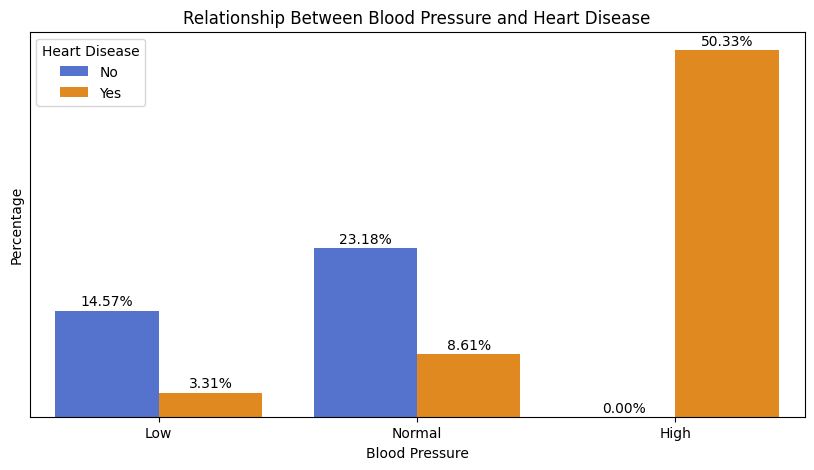

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 5))

# Getting the total number of observations
total = float(len(df))

# Creating a countplot with 'Blood Pressure' on the x-axis, 'Heart Disease' as hue, and a specified color palette
ax = sns.countplot(x='Blood Pressure', hue='Heart Disease', data=df, palette=b_palette, order=['Low', 'Normal', 'High'])

# Adding percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, '{:.2%}'.format(height / total), ha="center")

# Adding title, y-axis label, and removing y-axis ticks
plt.title('Relationship Between Blood Pressure and Heart Disease')
plt.ylabel('Percentage')
plt.yticks([])

# Displaying the plot
plt.show()